In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

[4.000000000000999, 1.9999999999999984]
475


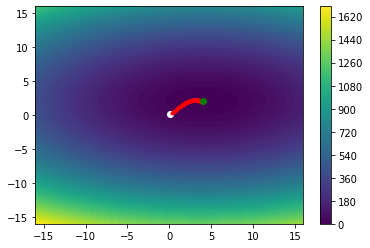

In [5]:
from numpy.core.fromnumeric import resize
func = lambda th: (th[0]-4)**2+4*(th[1]-2)**2

#Representamos la función
_x =np.linspace(-16,16, 100)
_y =np.linspace(-16,16, 100)
_z=np.zeros((100,100))
for ix, x in enumerate(_x):
  for iy, y in enumerate(_y):
    _z[iy,ix]=func([x,y])

plt.contourf(_x,_y,_z,100)
plt.colorbar()

#Algoritmo Nadam
min=[4,2]
Theta=[0.1,0.1]
Thetaold = [0,0]
lr=0.1
b1= 0.9
b2=0.999
k=1
E=10**(-8)
plt.plot(Theta[0],Theta[1], "o", c = "white")
grad=np.zeros(2)
m=[0,0]
v=[0,0]
M=np.zeros(2)
V=np.zeros(2)
contador= 0
diferencia=1

for _ in range(10000):

  if diferencia < 10**-12:
    break
  else:
    grad[0] = 2*Theta[0]-8
    grad[1]= 8*Theta[1]-16
    for it, th in enumerate(Theta):
        m[it]= b1*m[it] + (1-b1)* grad[it]
        v[it]= b2*v[it] + (1-b2)* grad[it]**2
    
    b1k= b1**(k)
    b2k= b2**(k)
    k=k+1

    for it, th in enumerate(Theta):
      M[it]= m[it]/(1-b1k)
      V[it]= v[it]/(1-b2k)
    
    for it, th in enumerate(Theta):  
      Thetaold[it]=Theta[it]
      Theta[it] = Theta[it] - (lr/ np.sqrt(V[it] + E)) * (b1*M[it] + (1-b1)*grad[it]/(1-b1k))
      #print(Theta)
    plt.plot(Theta[0],Theta[1], ".", c = "red")
    
    diferencia=np.sqrt((min[0]-Theta[0])**2+(min[1]-Theta[1])**2)
    #print(diferencia)
    contador=contador+1

print(Theta)
print(contador)
plt.plot(Theta[0],Theta[1], "o", c = "green")

plt.show()